# 1. Загружаем библиотеки и данные

In [56]:
from pandas import Series
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

RANDOM_SEED = 11

In [57]:
df = pd.read_csv('train.csv')

In [58]:
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [60]:
test = pd.read_csv('test.csv')

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [62]:
sample = pd.read_csv('sample_submission.csv')

In [63]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB


# 2. EDA

<AxesSubplot:>

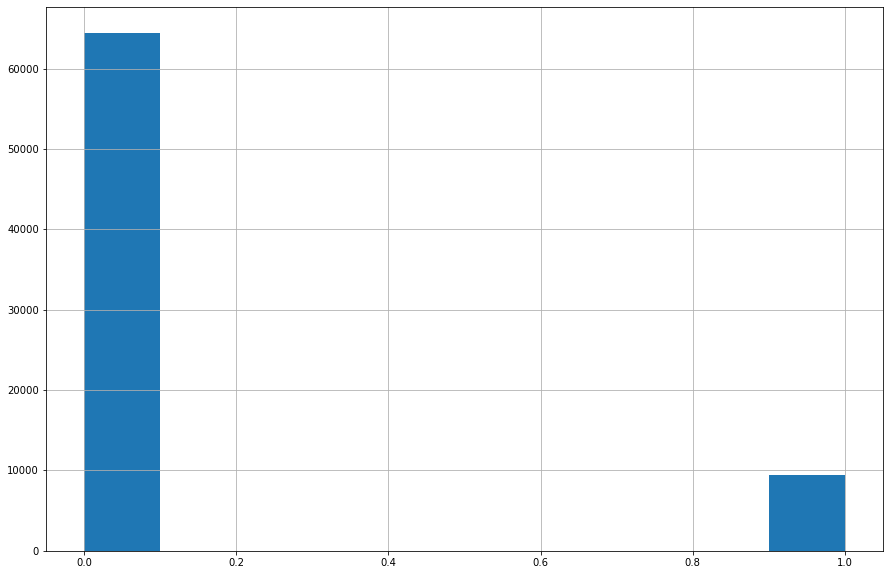

In [64]:
df.default.hist()

Видим, что выборка несбалансированная

In [65]:
df['type'] = 1  
test['type'] = 0    
test['default'] = 2
data = pd.concat([df, test], ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

<AxesSubplot:>

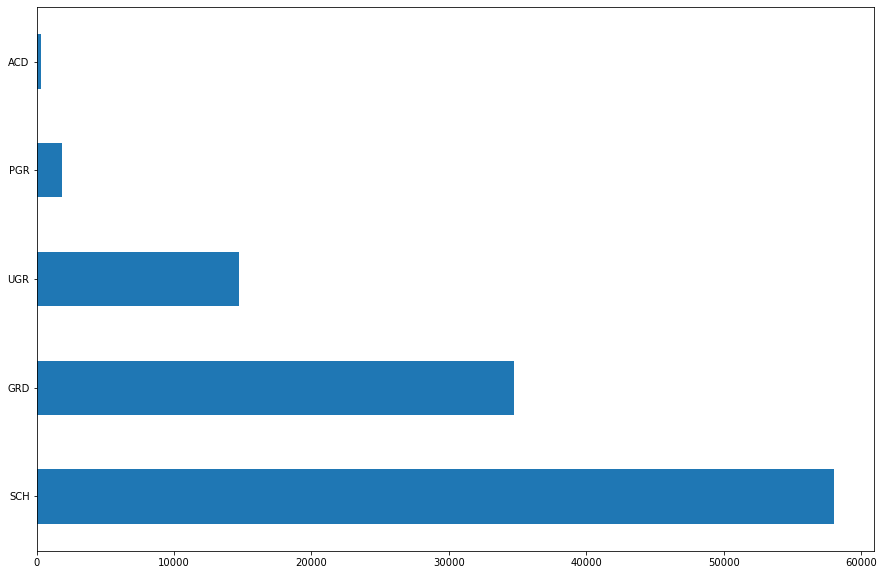

In [66]:
data.education.value_counts().plot.barh()

In [67]:
#заполним пропуски самым частым значением
data.education = data.education.fillna("SCH")

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         110148 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [69]:
data.region_rating.value_counts()

50    40981
60    23999
40    17947
80    17170
70     9304
30      434
20      313
Name: region_rating, dtype: int64

In [70]:
data.sna.value_counts()

1    70681
4    17481
2    15832
3     6154
Name: sna, dtype: int64

In [71]:
data.first_time.value_counts()

3    46588
4    28017
1    18296
2    17247
Name: first_time, dtype: int64

In [72]:
num_cols = ["decline_app_cnt", "income", "age", "bki_request_cnt", "score_bki", "region_rating"]

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


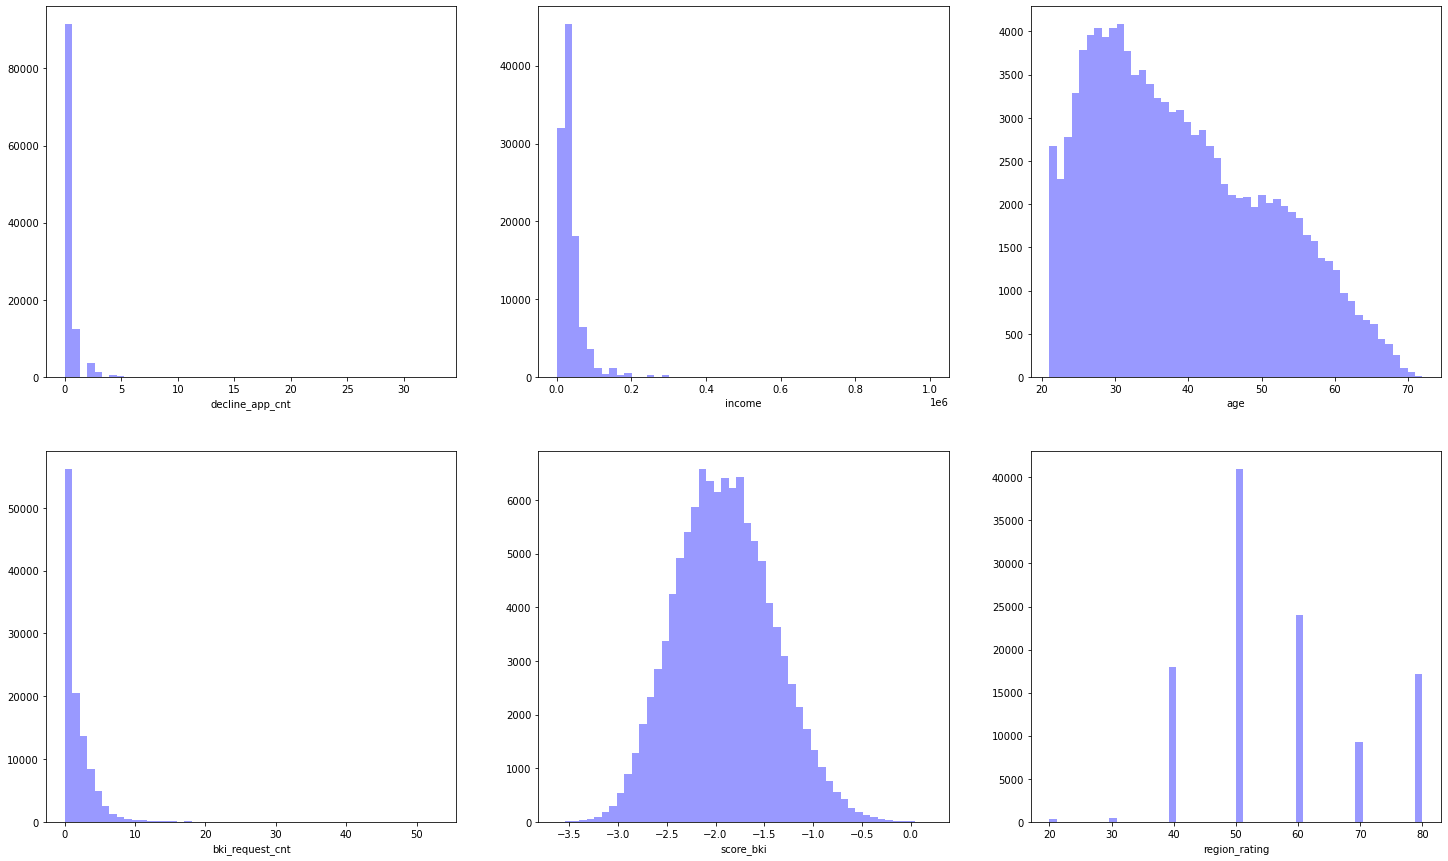

In [73]:
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for i,col in enumerate(num_cols):
    sns.distplot(data[col], kde=False, ax=axes.flat[i], color="b")

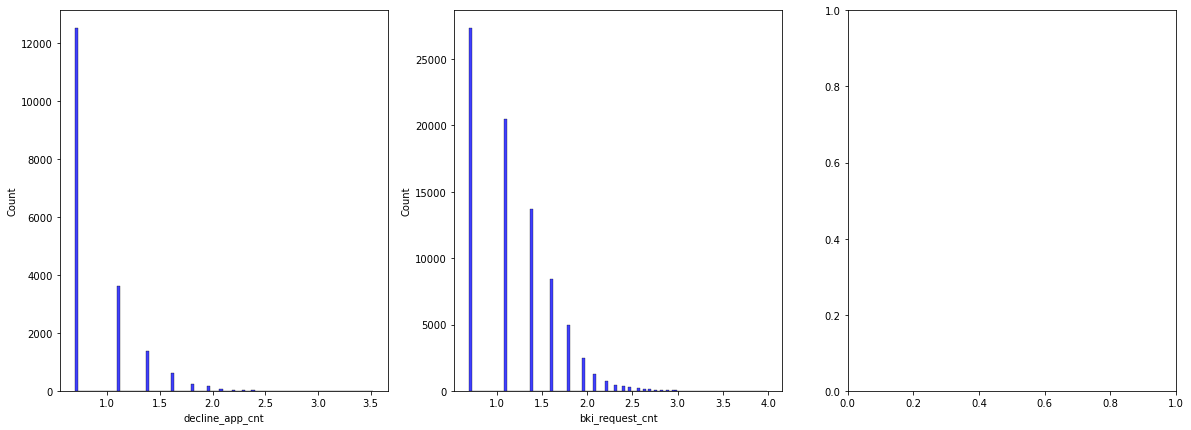

In [74]:
#логарифмируем, чтобы сделать распределение нормальным
fig, axes = plt.subplots(1, 3, figsize=(20,7))
for i,col in enumerate(['decline_app_cnt', 'bki_request_cnt']):
    data[col] = np.log(data[col] + 1)
    sns.histplot(data[col][data[col] > 0].dropna(), ax=axes.flat[i],kde = False, color="b")

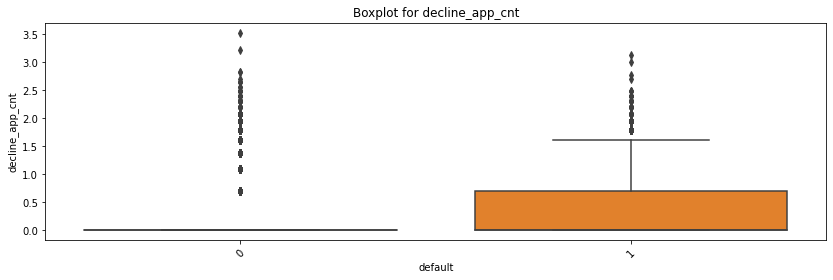

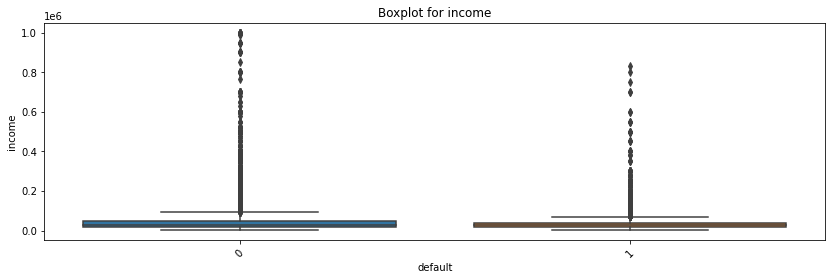

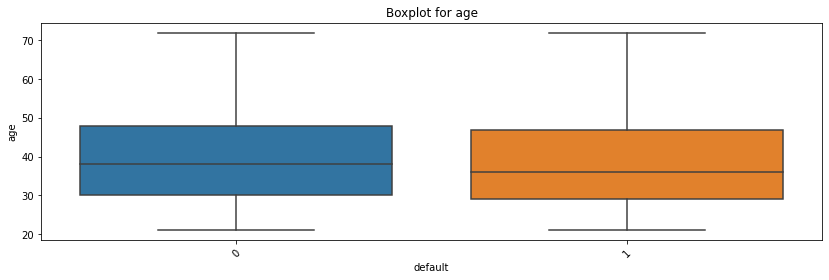

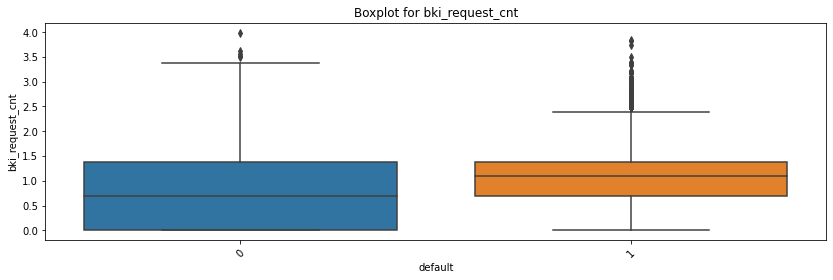

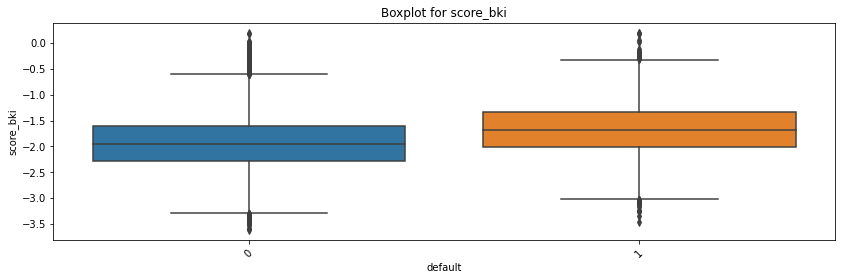

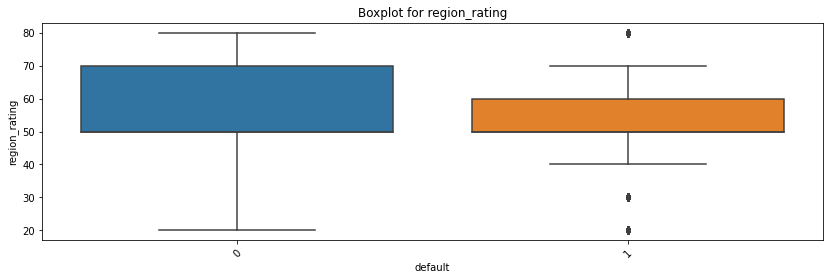

In [75]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x='default', y=column,
                data=data[data['type']==1],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in num_cols:
    get_boxplot(col)

Промежуточные выводы:
1. Большее количество отказанных прошлых заявок характерно для дефолта
2. Те, кто возвращает кредит без проблем, имеют как правило более высокую зарплату
3. Молодые более подвержены дефолту
4. Более частая проверка кредитной истории характерна для дефолта
5. Имеющие более высокий скоринговый балл до данным из БКИ более склонны к дефолту
6. Более низкий рейтинг региона характерен для дефолта

<AxesSubplot:>

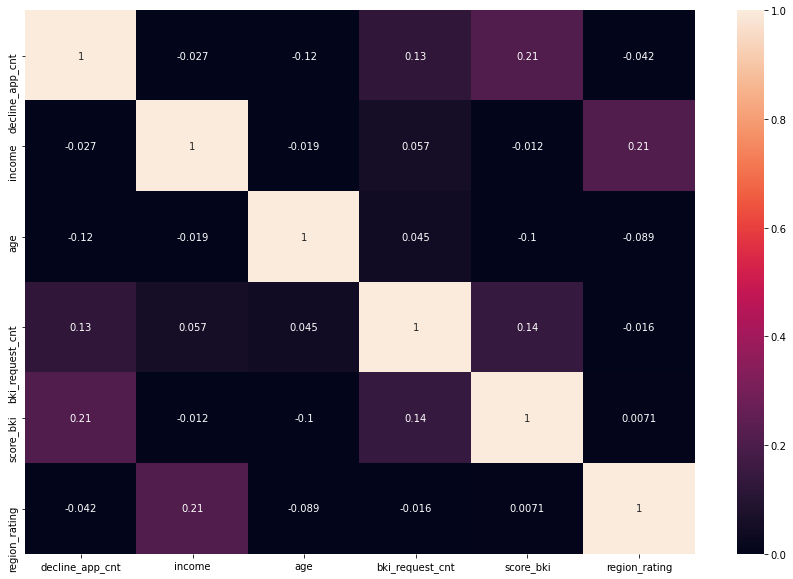

In [76]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data[num_cols].corr(), vmin=0, vmax=1, annot = True)

Среди количественных переменных сильной корреляции нет

Есть сильная зависимость между домашним и рабочим адресом, а также между давностью хранения информации и связью с клиентом банка

In [77]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(data['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [78]:
bin_cols = ['sex','car','car_type','foreign_passport','good_work']

In [79]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
    
# убедимся в преобразовании    
data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,type
0,25905,01FEB2014,SCH,1,62,1,1,0.000000,0,-2.008753,0.693147,50,1,2,18000,4,1,0,0,1
1,63161,12MAR2014,SCH,0,59,0,0,0.000000,0,-1.532276,1.386294,50,2,3,19000,4,1,0,0,1
2,25887,01FEB2014,SCH,1,25,1,0,1.098612,0,-1.408142,0.693147,80,1,2,30000,1,4,1,0,1
3,16222,23JAN2014,SCH,0,53,0,0,0.000000,0,-2.057471,1.098612,50,2,3,10000,1,3,0,0,1
4,101655,18APR2014,GRD,1,48,0,0,0.000000,1,-1.244723,0.693147,60,2,3,30000,1,4,1,0,1


In [80]:
cat_cols = ['education','home_address','work_address', 'sna', 'first_time', 'app_date']

In [81]:
edu_dict = {'SCH' : 1, 'GRD' : 2, 'UGR' : 3, 'PGR' : 4, 'ACD' : 5}
data['education'] = data['education'].replace(to_replace=edu_dict)

In [82]:
#преобразуем к виду сколько дней прошло с первой даты
data['app_date'] = pd.to_datetime(data.app_date)
data['app_date'] = data['app_date'].apply(lambda x: (x - data['app_date'].min()).days) 

In [83]:
data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,type
0,25905,31,1,1,62,1,1,0.000000,0,-2.008753,0.693147,50,1,2,18000,4,1,0,0,1
1,63161,70,1,0,59,0,0,0.000000,0,-1.532276,1.386294,50,2,3,19000,4,1,0,0,1
2,25887,31,1,1,25,1,0,1.098612,0,-1.408142,0.693147,80,1,2,30000,1,4,1,0,1
3,16222,22,1,0,53,0,0,0.000000,0,-2.057471,1.098612,50,2,3,10000,1,3,0,0,1
4,101655,107,2,1,48,0,0,0.000000,1,-1.244723,0.693147,60,2,3,30000,1,4,1,0,1


<AxesSubplot:>

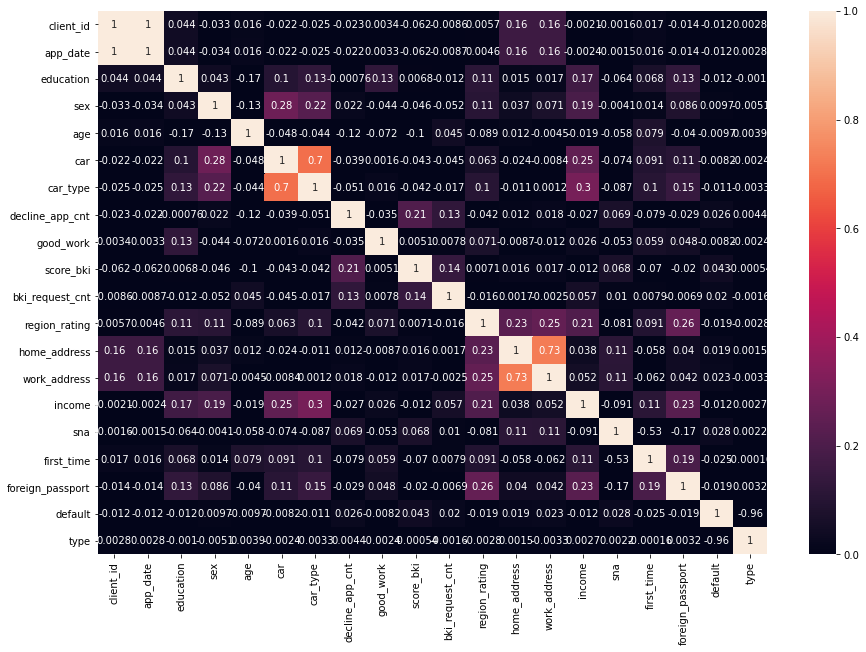

In [84]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.corr(), vmin=0, vmax=1, annot = True)

# 3. Feature Engineering

In [85]:
#добавим признак зарплата, делённая на рейтинг региона, так как уровень зарплат по регионам может отличаться
data['inc_per_reg'] = data['income'] / data['region_rating']

In [86]:
#добавим признак зарплата, делённая на возраст, так как некорректно сравнивать уровень зарплаты 20-летнего и 40-летнего заёмщика
data['inc_per_age'] = data['income'] / data['age']

In [87]:
#разделим зарплату на среднюю по полу, так как зарплаты у мужчин и женщин распределены неодинаково
f_mid = data['income'][data['sex'] == 0].median()
m_mid = data['income'][data['sex'] == 1].median()
data['inc_per_sex'] = data.apply(lambda x: x['income']/f_mid if x['sex'] == 0 else x['income']/m_mid, axis=1)

In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = data[['work_address', 'home_address']].values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA(n_components=1)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
data['address'] = pca_data
data = data.drop(['home_address','work_address'],axis=1)

In [89]:
#объединим также признаки car и car_type
data['car_new'] = data['car'] + data['car_type']
data = data.drop(['car', 'car_type'],axis=1)

In [90]:
data['bkisna'] = data['score_bki'] / data['sna']

In [91]:
data.head(10)

,client_id,app_date,education,sex,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,...,first_time,foreign_passport,default,type,inc_per_reg,inc_per_age,inc_per_sex,address,car_new,bkisna
0,25905,31,1,1,62,0.000000,0,-2.008753,0.693147,50,...,1,0,0,1,360.000000,290.322581,0.450,-1.282573,2,-0.502188
1,63161,70,1,0,59,0.000000,0,-1.532276,1.386294,50,...,1,0,0,1,380.000000,322.033898,0.760,1.086059,0,-0.383069
2,25887,31,1,1,25,1.098612,0,-1.408142,0.693147,80,...,4,1,0,1,375.000000,1200.000000,0.750,-1.282573,1,-1.408142
3,16222,22,1,0,53,0.000000,0,-2.057471,1.098612,50,...,3,0,0,1,200.000000,188.679245,0.400,1.086059,0,-2.057471
4,101655,107,2,1,48,0.000000,1,-1.244723,0.693147,60,...,4,1,0,1,500.000000,625.000000,0.750,1.086059,0,-1.244723
5,41415,48,1,1,27,0.000000,1,-2.032257,0.000000,50,...,3,0,0,1,300.000000,555.555556,0.375,-2.310872,1,-1.016129
6,28436,34,1,1,39,0.000000,0,-2.225004,0.000000,60,...,1,0,0,1,466.666667,717.948718,0.700,-1.282573,0,-2.225004
7,68769,75,1,0,39,0.000000,0,-1.522739,0.693147,50,...,3,0,0,1,900.000000,1153.846154,1.800,1.086059,0,-0.507580
8,38424,44,1,0,50,0.693147,0,-1.676061,0.000000,50,...,4,0,0,1,600.000000,600.000000,1.200,-2.310872,1,-1.676061
9,4496,9,3,0,54,0.000000,0,-2.695176,0.693147,50,...,3,0,0,1,480.000000,444.444444,0.960,1.086059,0,-2.695176


In [92]:
num_cols = ["decline_app_cnt", "income", "age", "bki_request_cnt", "score_bki", "region_rating", "inc_per_reg", "inc_per_age", "inc_per_sex"]

In [93]:
data[num_cols] = pd.DataFrame(StandardScaler().fit_transform(data[num_cols]), columns = data[num_cols].columns)

<AxesSubplot:>

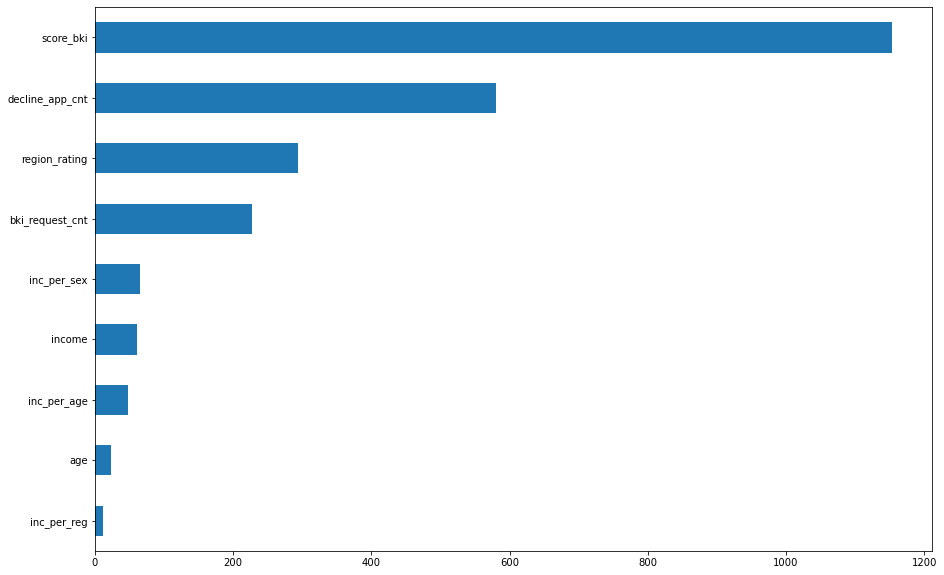

In [94]:
imp_num = pd.Series(f_classif(data[num_cols], data['default'])[0], index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind = 'barh')

In [95]:
bin_cols = ['sex','car_new', 'foreign_passport','good_work']
cat_cols = ['education', 'address', 'sna', 'first_time', 'app_date']

<AxesSubplot:>

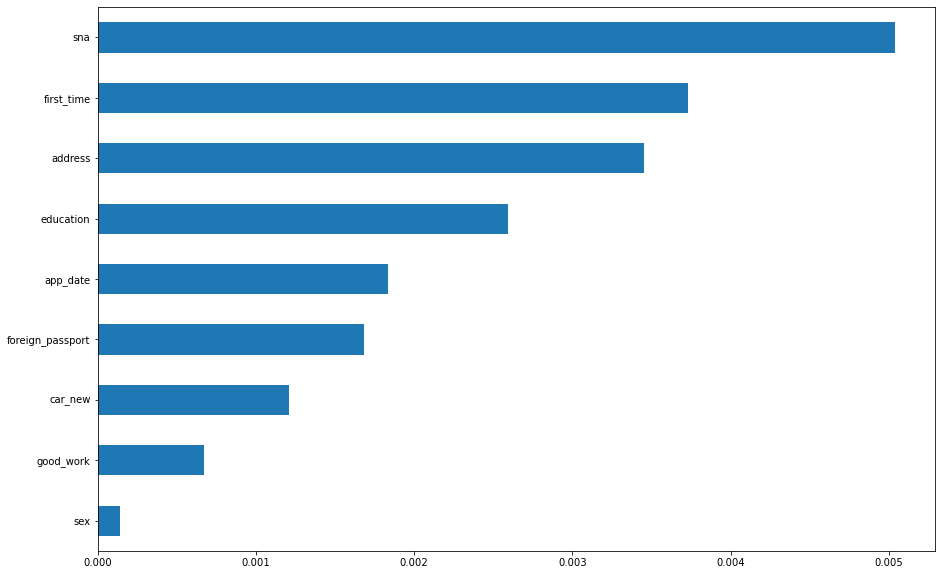

In [96]:
imp_cat = Series(mutual_info_classif(data[bin_cols + cat_cols], data['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [97]:
# Объединяем
X = data.query('type == 1').drop(['type', 'client_id', 'default'], axis=1).values
Y = data.query('type == 1').drop(['type','client_id'], axis=1)['default'].values

In [98]:
data


,client_id,app_date,education,sex,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,...,first_time,foreign_passport,default,type,inc_per_reg,inc_per_age,inc_per_sex,address,car_new,bkisna
0,25905,31,1,1,1.975219,-0.418815,0,-0.208688,-0.281790,-0.516704,...,1,0,0,1,-0.455401,-0.696290,-0.609019,-1.282573,2,-0.502188
1,63161,70,1,0,1.714757,-0.418815,0,0.745419,0.770563,-0.516704,...,1,0,0,1,-0.430578,-0.670045,-0.388363,1.086059,0,-0.383069
2,25887,31,1,1,-1.237142,2.621662,0,0.993988,-0.281790,1.779355,...,4,1,0,1,-0.436784,0.056580,-0.395481,-1.282573,1,-1.408142
3,16222,22,1,0,1.193834,-0.418815,0,-0.306243,0.333797,-0.516704,...,3,0,0,1,-0.653988,-0.780413,-0.644609,1.086059,0,-2.057471
4,101655,107,2,1,0.759731,-0.418815,1,1.321223,-0.281790,0.248649,...,4,1,0,1,-0.281638,-0.419304,-0.395481,1.086059,0,-1.244723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,83775,89,1,0,-0.195295,1.499512,0,0.319505,0.770563,-0.516704,...,1,0,2,0,-0.529871,-0.601045,-0.502250,1.086059,0,-0.436244
110144,106254,114,2,0,2.148860,-0.418815,0,-0.779436,0.770563,0.248649,...,4,0,2,0,3.235001,1.649755,4.765035,-1.282573,2,-2.293781
110145,81852,88,2,1,-0.716218,2.621662,0,1.929901,-0.281790,-0.516704,...,2,0,2,0,0.587179,0.665283,0.138366,-1.282573,0,-0.235188
110146,1971,6,3,0,-1.063501,1.499512,0,1.325890,0.333797,1.779355,...,1,0,2,0,-0.436784,-0.016987,-0.075173,1.086059,0,-1.242392


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [100]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

multi_class = ['auto','ovr']

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty, multi_class=multi_class)

model = LogisticRegression(max_iter=10000, solver='liblinear')
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])
print('Лучшее multi_class:', best_model.best_estimator_.get_params()['multi_class'])

Лучшее Penalty: l1
Лучшее C: 1.0
Лучшее multi_class: ovr


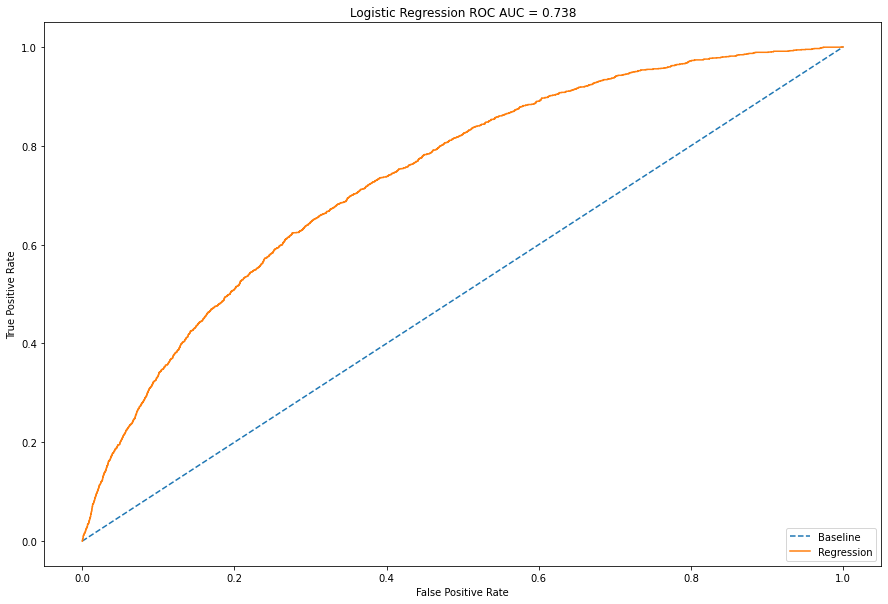

In [105]:
model = LogisticRegression(penalty = 'l1',C=1.0, max_iter=10000, multi_class='ovr',solver='liblinear')
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [106]:
Xt = data.query('type == 0').drop(['type', 'client_id', 'default'], axis=1).values
model = LogisticRegression(penalty = 'l1',C=1.0, max_iter=10000, multi_class='ovr',solver='liblinear')
model.fit(X, Y)
probs = model.predict_proba(Xt)
probs = probs[:,1]

In [107]:
results_df = pd.DataFrame(data={'client_id':test['client_id'], 'default':probs})
results_df.to_csv('submission.csv', index=False)
results_df

,client_id,default
0,74835,0.046370
1,17527,0.328354
2,75683,0.050814
3,26883,0.081046
4,28862,0.030326
...,...,...
36344,83775,0.325776
36345,106254,0.028310
36346,81852,0.329122
36347,1971,0.204371


In [108]:
results_df.to_csv('submission.csv', index=False)